## Variable selection method - Bi-directional elimination

It is a combination of forward selection and backward elimination. While adding a new feature in one direction, it also checks the significance of already added features and if it finds any of the already selected features insignificant, then it simply removes that particular feature through backward elimination.

### Bi-directional
- RF - score on test data: 94.982%
- MLP - score on test data: 94.39%

In [1]:
# Importing all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

import random
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading the cleaned dataset

group_16_df = pd.read_csv('Group_16_data_cleaned.csv')
group_16_df.head()

,Unnamed: 0,Subject,Hold .,Hold t,Hold i,Hold e,Hold Shift,Hold 5,Hold Shift.1,Hold Caps,...,Size Caps,Size r,Size o,Size a,Size n,Size l,Size Enter,AvH,AvP,AvA
0,0,1.0,106.0,92.0,111.0,85.0,123.0,82.0,70.0,101.00,...,0.225806,0.225806,0.322581,0.290323,0.225806,0.354839,0.274194,103.035714,0.190971,0.288018
1,1,1.0,106.0,88.0,111.0,83.0,123.0,101.0,81.0,94.00,...,0.225806,0.225806,0.322581,0.322581,0.258065,0.387097,0.322581,103.035714,0.186514,0.285138
2,2,1.0,106.0,90.0,111.0,65.0,79.0,73.0,96.0,63.25,...,0.225806,0.193548,0.290323,0.322581,0.225806,0.258065,0.274194,103.035714,0.186171,0.285138
3,3,1.0,106.0,81.0,111.0,72.0,83.0,94.0,89.0,104.00,...,0.225806,0.225806,0.258065,0.290323,0.225806,0.322581,0.322581,103.035714,0.177943,0.285138
4,4,1.0,106.0,72.0,111.0,82.0,62.0,89.0,68.0,88.00,...,0.290323,0.225806,0.322581,0.258065,0.225806,0.290323,0.387097,103.035714,0.163971,0.285138


In [3]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [4]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 71) (1999,)
(857, 71) (857,)


## Random Forest

In [5]:
#  extracting the important features using Bi-directional elimination method

random.seed(22) #for reproducibility

model1 = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)

rf = SFS(model1, k_features = (1, 71), forward = True, floating = True, cv = 5, n_jobs = -1)
rf.fit(x_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(max_depth=60,
                                                           n_estimators=290,
                                                           random_state=222),
                          floating=True, k_features=(1, 71), n_jobs=-1,
                          scoring='accuracy')

In [6]:
idx = np.array(list(map(int, rf.k_feature_names_))) + 2
features = list(group_16_df.iloc[:, idx].keys())
features

['Hold .',
 'Hold i',
 'Hold e',
 'Hold 5',
 'Hold Shift.1',
 'Hold Caps',
 'Hold o',
 'Hold a',
 'Hold n',
 'Hold l',
 'Hold Enter',
 'DD ..t',
 'DD t.i',
 'DD i.e',
 'DD e.Shift',
 'DD Shift.5',
 'DD Shift.Caps',
 'DD Caps.r',
 'DD o.a',
 'DD a.n',
 'DD n.l',
 'DD l.Enter',
 'UD ..t',
 'UD t.i',
 'UD i.e',
 'UD e.Shift',
 'UD Shift.5',
 'UD 5.Shift',
 'UD Shift.Caps',
 'UD Caps.r',
 'UD r.o',
 'UD a.n',
 'UD n.l',
 'UD l.Enter',
 'Pressure .',
 'Pressure t',
 'Pressure i',
 'Pressure Shift',
 'Pressure 5',
 'Pressure Shift.1',
 'Pressure Caps',
 'Pressure r',
 'Pressure o',
 'Pressure n',
 'Pressure Enter',
 'Size t',
 'Size i',
 'Size e',
 'Size Shift',
 'Size 5',
 'Size Caps',
 'Size r',
 'Size a',
 'Size n',
 'Size l',
 'Size Enter',
 'AvH',
 'AvP',
 'AvA']

#### important features = ['Hold .', 'Hold i', 'Hold e', 'Hold 5', 'Hold Shift.1', 'Hold Caps', 'Hold o', 'Hold a', 'Hold n', 'Hold l', 'Hold Enter', 'DD ..t', 'DD t.i', 'DD i.e', 'DD e.Shift', 'DD Shift.5', 'DD Shift.Caps', 'DD Caps.r', 'DD o.a', 'DD a.n', 'DD n.l', 'DD l.Enter', 'UD ..t', 'UD t.i', 'UD i.e', 'UD e.Shift', 'UD Shift.5', 'UD 5.Shift', 'UD Shift.Caps', 'UD Caps.r', 'UD r.o', 'UD a.n', 'UD n.l', 'UD l.Enter', 'Pressure .', 'Pressure t', 'Pressure i', 'Pressure Shift', 'Pressure 5', 'Pressure Shift.1', 'Pressure Caps', 'Pressure r', 'Pressure o', 'Pressure n', 'Pressure Enter', 'Size t', 'Size i', 'Size e', 'Size Shift', 'Size 5', 'Size Caps', 'Size r', 'Size a', 'Size n', 'Size l', 'Size Enter', 'AvH', 'AvP', 'AvA']

In [7]:
# Building new datasets by removing unwanted features

x, y = group_16_df[features], group_16_df['Subject']
x.shape, y.shape

((2856, 59), (2856,))

In [8]:
# again splitting this new dataset as train(70%) and test(30%) sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 59) (1999,)
(857, 59) (857,)


In [9]:
# Fitting optimum random forest classifier (from part - 2) on this new feature set

rf = RandomForestClassifier(random_state = 222, n_estimators = 290, max_depth = 60)
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=60, n_estimators=290, random_state=222)

In [10]:
# train & test accuracies 

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.9498249708284714


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       0.94      1.00      0.97        17
         3.0       1.00      0.93      0.96        14
         4.0       1.00      0.89      0.94        18
         5.0       1.00      0.94      0.97        16
         6.0       0.94      1.00      0.97        15
         7.0       0.88      1.00      0.94        15
         8.0       1.00      1.00      1.00        23
         9.0       0.79      1.00      0.88        11
        10.0       0.94      0.94      0.94        16
        11.0       1.00      0.87      0.93        15
        12.0       0.94      1.00      0.97        16
        13.0       0.81      1.00      0.90        13
        14.0       0.94      1.00      0.97        17
        15.0       1.00      1.00      1.00        17
        16.0       1.00      0.93      0.97        15
        17.0       0.88      1.00      0.93        14
        18.0       0.94    

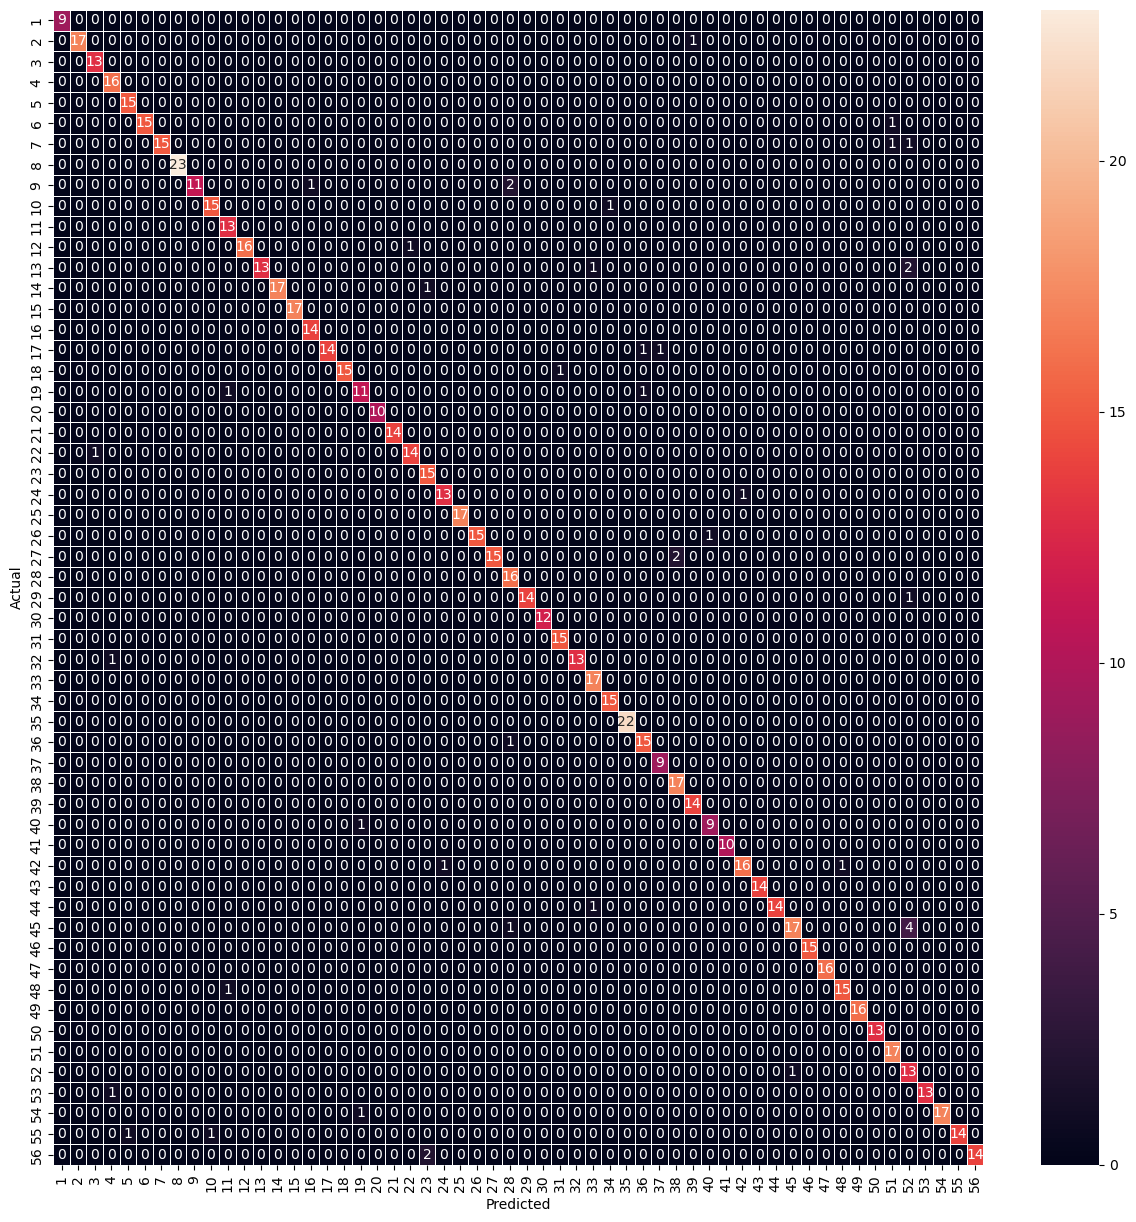

In [11]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification report

print(classification_report(y_test, y_pred_test))

## Deep Learning / MLP

In [52]:
# extracting and assigning the input and output variables from the dataset

x, y = group_16_df.iloc[:, 2:].values, group_16_df['Subject'].values
x.shape, y.shape

((2856, 71), (2856,))

In [53]:
# splitting the imported dataset as train(70%) and test(30%) sets.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 71) (1999,)
(857, 71) (857,)


In [75]:
#  extracting the important features using Bi-directional elimination method

random.seed(444) #for reproducibility

warnings.filterwarnings("always")

model2 = MLPClassifier(solver = 'adam', learning_rate = 'constant', alpha = 0.001,
          activation = 'logistic', random_state = 222, max_iter = 5000)

mlp = SFS(model2, k_features = (1, 71), forward = True, floating = False, cv = 5, n_jobs = -1)


In [76]:
# x_train.shape[1]
mlp.fit(x_train, y_train)

SequentialFeatureSelector(estimator=MLPClassifier(alpha=0.001, max_iter=5000,
                                                  random_state=222),
                          k_features=(1, 71), n_jobs=-1, scoring='accuracy')

In [77]:
idx = np.array(list(map(int, mlp.k_feature_names_))) + 2
features = list(group_16_df.iloc[:, idx].keys())
features

['Hold .',
 'Hold t',
 'Hold i',
 'Hold e',
 'Hold Shift',
 'Hold 5',
 'Hold Shift.1',
 'Hold Caps',
 'Hold r',
 'Hold o',
 'Hold a',
 'Hold n',
 'Hold l',
 'Hold Enter',
 'DD ..t',
 'DD t.i',
 'DD i.e',
 'DD e.Shift',
 'DD 5.Shift',
 'DD Shift.Caps',
 'DD Caps.r',
 'DD r.o',
 'DD o.a',
 'DD a.n',
 'DD n.l',
 'DD l.Enter',
 'UD ..t',
 'UD t.i',
 'UD i.e',
 'UD e.Shift',
 'UD Shift.5',
 'UD 5.Shift',
 'UD Shift.Caps',
 'UD Caps.r',
 'UD r.o',
 'UD o.a',
 'UD a.n',
 'UD n.l',
 'UD l.Enter',
 'Pressure .',
 'Pressure t',
 'Pressure i',
 'Pressure e',
 'Pressure Shift',
 'Pressure 5',
 'Pressure Shift.1',
 'Pressure Caps',
 'Pressure r',
 'Pressure o',
 'Pressure a',
 'Pressure n',
 'Pressure l',
 'Pressure Enter',
 'Size .',
 'Size t',
 'Size i',
 'Size Shift',
 'Size 5',
 'Size Shift.1',
 'Size Caps',
 'Size r',
 'Size o',
 'Size a',
 'Size n',
 'Size l',
 'Size Enter',
 'AvH',
 'AvP',
 'AvA']

##### features = ['Hold .','Hold t','Hold i','Hold e','Hold Shift','Hold 5','Hold Shift.1','Hold Caps','Hold r','Hold o','Hold a','Hold n','Hold l','Hold Enter','DD ..t','DD t.i','DD i.e','DD e.Shift','DD 5.Shift','DD Shift.Caps','DD Caps.r','DD r.o','DD o.a','DD a.n','DD n.l','DD l.Enter','UD ..t','UD t.i','UD i.e','UD e.Shift','UD Shift.5','UD 5.Shift','UD Shift.Caps','UD Caps.r','UD r.o','UD o.a','UD a.n','UD n.l','UD l.Enter','Pressure .','Pressure t','Pressure i','Pressure e','Pressure Shift','Pressure 5','Pressure Shift.1','Pressure Caps','Pressure r','Pressure o','Pressure a','Pressure n','Pressure l','Pressure Enter','Size .','Size t','Size i','Size Shift','Size 5','Size Shift.1','Size Caps','Size r','Size o','Size a','Size n','Size l','Size Enter','AvH','AvP','AvA']

In [78]:
# Building new datasets by removing unwanted features

x, y = group_16_df[features], group_16_df['Subject']
x.shape, y.shape

((2856, 69), (2856,))

In [79]:
# again splitting this new dataset as train(70%) and test(30%) sets.

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 222)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

(1999, 69) (1999,)
(857, 69) (857,)


In [80]:
# Fitting optimum MLP Classifier on this new feature set

mlp = MLPClassifier(solver = 'adam', learning_rate = 'constant', hidden_layer_sizes = (1000,), alpha = 0.0001,
          activation = 'logistic')
mlp.fit(x_train, y_train)

/Applications/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(1000,))

In [81]:
# train & test accuracies 

y_pred_train = mlp.predict(x_train)
y_pred_test = mlp.predict(x_test)

train_score = accuracy_score(y_pred_train, y_train)
print("score on train data: ", train_score)
test_score = accuracy_score(y_pred_test, y_test)
print("score on test data: ", test_score)

score on train data:  1.0
score on test data:  0.9439906651108518


              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         9
         2.0       0.89      1.00      0.94        17
         3.0       1.00      1.00      1.00        14
         4.0       1.00      0.94      0.97        18
         5.0       1.00      0.94      0.97        16
         6.0       0.94      1.00      0.97        15
         7.0       1.00      1.00      1.00        15
         8.0       1.00      0.96      0.98        23
         9.0       0.82      0.82      0.82        11
        10.0       1.00      0.88      0.93        16
        11.0       1.00      1.00      1.00        15
        12.0       1.00      1.00      1.00        16
        13.0       1.00      1.00      1.00        13
        14.0       0.78      0.82      0.80        17
        15.0       0.94      1.00      0.97        17
        16.0       0.87      0.87      0.87        15
        17.0       0.78      1.00      0.88        14
        18.0       0.88    

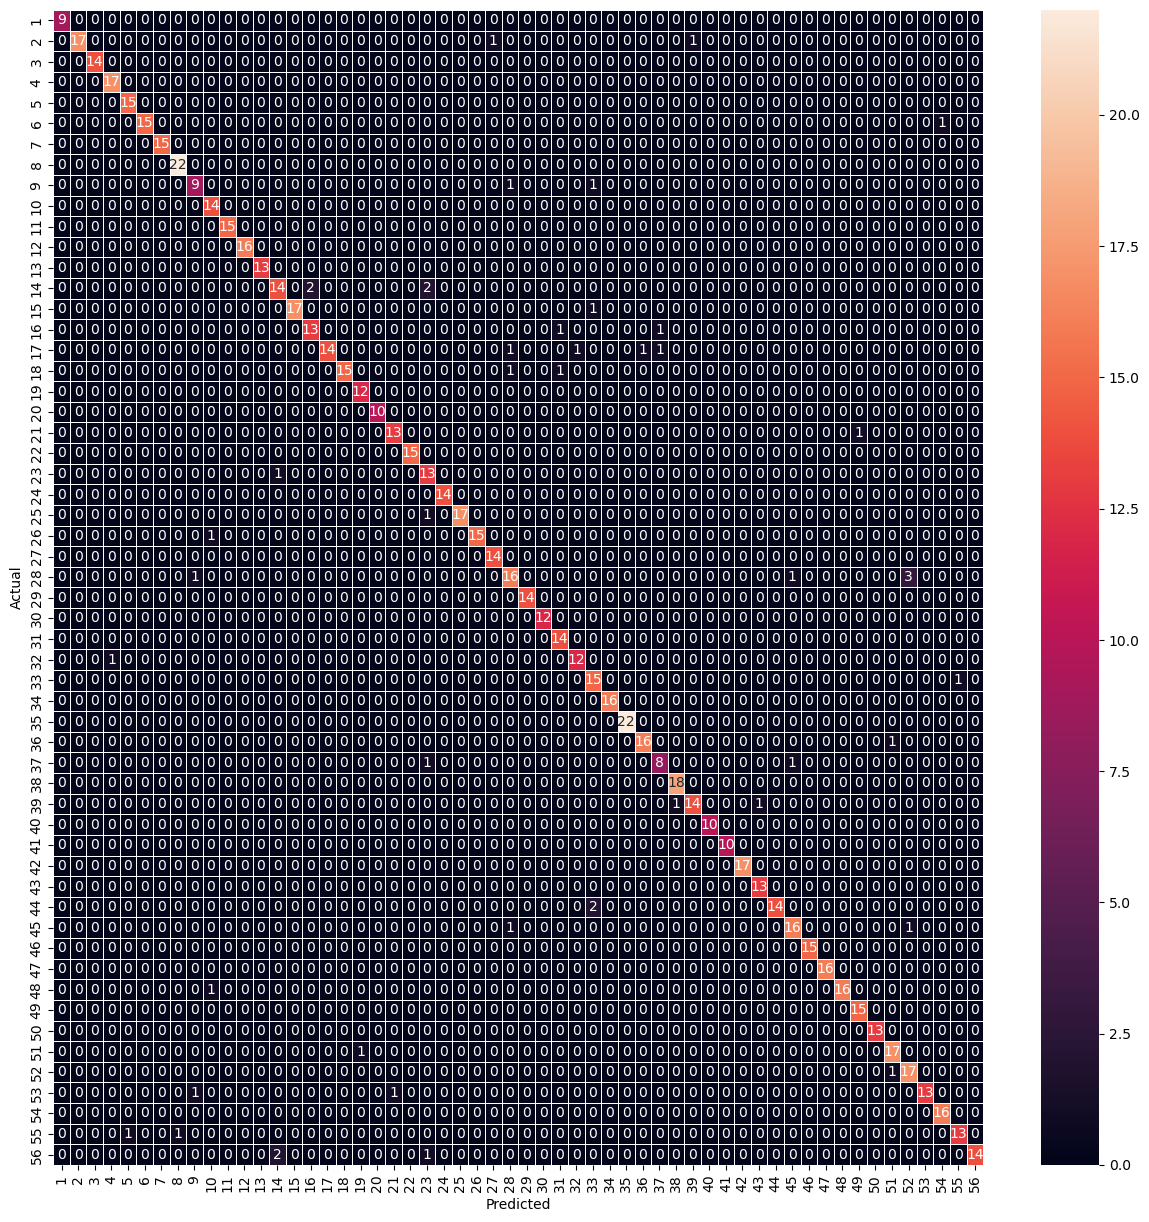

In [82]:
# Confusion matrix 

cm = confusion_matrix(y_pred_test, y_test)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax, 
            xticklabels = list(range(1,57)),
            yticklabels = list(range(1,57)))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Classification report

print(classification_report(y_test, y_pred_test))